In [18]:
#######################################
#imports
#######################################

%load_ext autoreload
%autoreload 2
def append_to_path(dir0):
    if dir0 not in sys.path:
        sys.path.append(dir0)

import os, sys, json
from mountainlab_pytools import mlproc as mlp
import spikeforestwidgets as SFW

append_to_path(os.getcwd()+'/../..')
from mountainsort4_1_0 import sort_dataset as ms4_sort_dataset
from validate_sorting_results import validate_sorting_results

from synthesize_dataset import synthesize_dataset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
#######################################
# LARI login
#######################################

SFW.LariLoginWidget().display()

JSProxyWidget(status='Not yet rendered')

In [20]:
Pipeline=mlp.initPipeline()

JSProxyWidget(status='Not yet rendered')

In [27]:
# Make synthetic ephys data
dsdir=os.getcwd()+'/dataset'
with Pipeline:
    synthesize_dataset(dsdir,M=4,duration=600)

Output()

Finished pipeline.


In [28]:
## Note that the following does not work yet when using the local computer for computation
## because I have not yet exposed the file system to the javascript widget

#SFW.viewDataset(directory=dsdir)

In [29]:
#######################################
# Create output directory
#######################################

output_base_dir=os.getcwd()+'/output'
if not os.path.exists(output_base_dir):
    os.mkdir(output_base_dir)

In [32]:
Pipeline=mlp.initPipeline()

JSProxyWidget(status='Not yet rendered')

In [33]:
#######################################
# RUN THE PIPELINE
#######################################
output_dir=output_base_dir+'/ms4'
with Pipeline:
    ms4_sort_dataset(dataset_dir=dsdir,output_dir=output_dir,adjacency_radius=-1,detect_threshold=3)

Output()

Finished pipeline.


In [34]:
Pipeline=mlp.initPipeline()

JSProxyWidget(status='Not yet rendered')

In [35]:
with Pipeline:
    validate_sorting_results(dataset_dir=dsdir,sorting_output_dir=output_dir,output_dir=output_dir)

Output()

Finished pipeline.


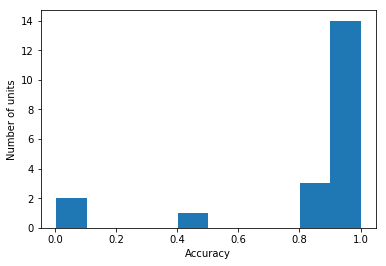

In [36]:
from matplotlib import pyplot as plt
fname=output_dir+'/compare_ground_truth.json'
with open(fname,'r') as f:
    obj=json.load(f)
true_units=obj['true_units']
units=[]
for k in true_units:
    units.append(true_units[k])
accuracies=[unit['accuracy'] for unit in units]
plt.hist(accuracies)
plt.title('')
plt.xlabel('Accuracy')
plt.ylabel('Number of units')
plt.show()